In [1]:
import matplotlib
# matplotlib.use('Qt5Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
from qutip.qip.algorithms import qft

# Unitaries
$U_3(\theta,\varphi,\rho)$

$U_2(\rho) := U_3(\pi/2, \varphi, \rho)$

$U_1(\rho) := U_3(0,0,\rho) $

All the other Pauli and Clifford gates can be defined in terms of these. 

In [2]:
U3 = lambda theta, phi, rho: Qobj([[np.cos(theta / 2), -np.exp(1j * rho) * np.sin(theta / 2)],
                                     [np.exp(1j * phi) * np.sin(theta / 2),
                                      np.exp(1j * rho + 1j * phi) * np.cos(theta / 2)]],dims=[[2],[2]])
U2 = lambda phi, rho: U3(np.pi/2, phi, rho)
U1 = lambda rho: U3(0,0,rho)
CU3 = lambda theta, phi, rho: Qobj([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, np.exp(-1j*(phi + rho)/2)*np.cos(theta/2), -np.exp(-1j*(phi - rho)/2)*np.sin(theta/2)],
    [0, 0, np.exp(-1j*(phi - rho)/2)*np.sin(theta/2), np.exp(1j*(phi + rho)/2)*np.cos(theta/2)]
], dims=[[2,2],[2,2]])

X = U3(np.pi, 0, np.pi)
Y = U3(np.pi, np.pi/2, np.pi/2)
Z = U1(np.pi)

H = U2(0, np.pi)
S = U1(np.pi/2)

k0 = basis(2,0)
k1 = basis(2,1)
h0 = H * k0
h1 = H * k1
y0 = S * h0
y1 = S.dag() * h0

CNOT = U3(np.pi,0,np.pi)
R = lambda theta: U3(theta,0,0)

theta = 2*np.arcsin(1/2); 

In [3]:
A = Qobj([[1.5,0.5],[0.5, 1.5]]); A

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1.5 0.5]
 [0.5 1.5]]

In [4]:
U = U3(pi/2,0,0); U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

In [5]:
L = Qobj([[2,0],[0,1]]); L

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[2. 0.]
 [0. 1.]]

In [6]:
R(theta)*(R(theta)*L)


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.         -0.8660254 ]
 [ 1.73205081  0.5       ]]


$$\text{Diagonal: } \frac{1}{\lambda_1} = 1, \quad \frac{1}{\lambda_2} = \frac{1}{2}$$

$$ \Lambda^{-1} = \begin{bmatrix} 1 & \frac{-\sqrt{3}}{2} \\ \sqrt{3} & \frac{1}{2} \end{bmatrix}$$
Off-diagonal gives the probability for success: $(\sqrt{3} - \sqrt{3}/2)^2 = 0.75$

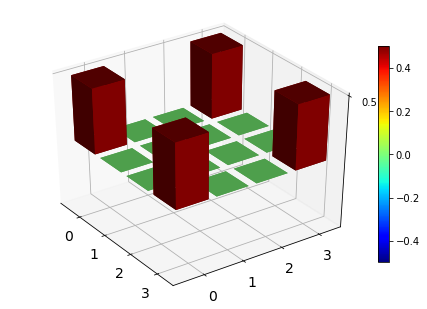

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

In [7]:
# Entangle two registers with CNOT gate
s0 = controlled_gate(N=2,U=CNOT,control=0,target=1) * tensor(h0,k0); s0
matrix_histogram(s0*s0.dag(),limits=[-0.5,0.5])
plt.show()
s0

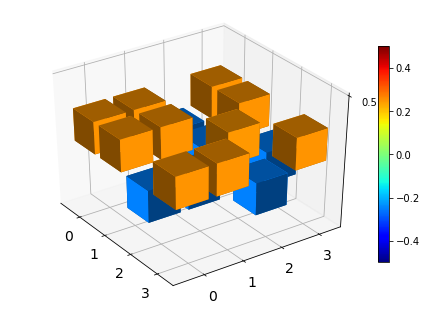

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [ 0.5]
 [-0.5]
 [ 0.5]]

In [8]:
s1 = tensor(identity(2),U) * s0; s1
matrix_histogram(s1*s1.dag(),limits=[-0.5,0.5])
plt.show()
s1

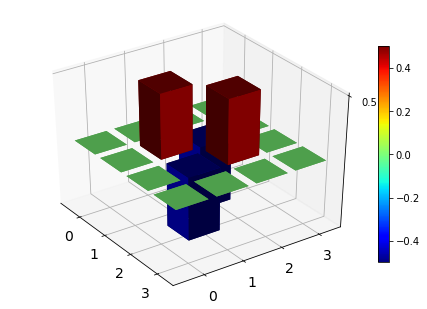

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [-0.70710678]
 [ 0.        ]]

In [9]:
s2 = tensor(U.dag(),identity(2)) * s1; s2

# s3 = tensor(s2,k1); 

matrix_histogram(s2*s2.dag(),limits=[-0.5,0.5])
plt.show()
s2

$$
     \frac{1}{\sqrt{2}}\vert 01 \rangle 
    - \frac{1}{\sqrt{2}}\vert 10 \rangle 
$$

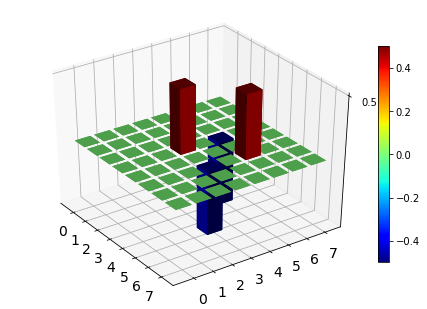

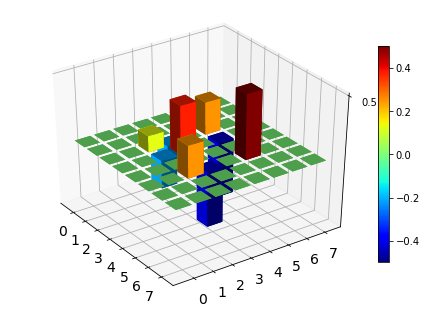

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [-0.35355339]
 [ 0.61237244]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]

In [10]:
s3 = tensor(s2,k1);
matrix_histogram(s3*s3.dag(),limits=[-0.5,0.5])
plt.show()

# The first inversion
s4 = controlled_gate(N=3,U=U3(theta,0,0),control=1,target=2)*s3; s4
matrix_histogram(s4*s4.dag(),limits=[-0.5,0.5])
plt.show()
s4



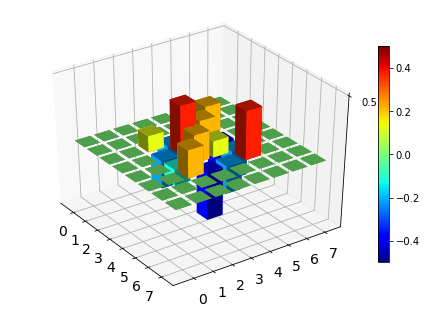

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [-0.35355339]
 [ 0.61237244]
 [ 0.35355339]
 [-0.61237244]
 [ 0.        ]
 [ 0.        ]]

In [11]:
# Second Inversion
s5 = controlled_gate(N=3,U=U3(theta,0,0),control=0,target=2)*s4; s5
matrix_histogram(s5*s5.dag(),limits=[-0.5,0.5])
plt.show()
s5

The above state corresponds to:
$$
    - \frac{1}{2\sqrt{2}}\vert 010 \rangle 
    + \frac{\sqrt{\frac{3}{2}}}{2} \vert 011 \rangle 
    - \frac{1}{2\sqrt{2}}\vert 100 \rangle 
    + \frac{\sqrt{\frac{3}{2}}}{2} \vert 101 \rangle 
$$

$$ \approx -0.354 \ \vert 010 \rangle +  0.6124 \ \vert 011 \rangle + -0.354 \ \vert 100 \rangle + 0.6124 \ \vert 101 \rangle $$


The solution 
$$ \vert x \rangle =A^{-1}\vert b \rangle = \frac{1}{2\sqrt{2}}\big( \vert 0 \rangle + \vert 1 \rangle \big)$$

In [9]:
s5*s5.dag()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.125      -0.21650635  0.125      -0.21650635
   0.          0.        ]
 [ 0.          0.         -0.21650635  0.375      -0.21650635  0.375
   0.          0.        ]
 [ 0.          0.          0.125      -0.21650635  0.125      -0.21650635
   0.          0.        ]
 [ 0.          0.         -0.21650635  0.375      -0.21650635  0.375
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]